In [20]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
# Visualization
import matplotlib.pyplot as plt
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz


In [21]:
bank_data = pd.read_csv('bank-marketing.csv', sep=';')

In [22]:
bank_data['default'] = bank_data['default'].map({'no':0,'yes':1,'unknown':0})
bank_data['y'] = bank_data['y'].map({'no':0,'yes':1})

In [23]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Align columns so train and test have same set
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


In [24]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[7129,  250],
       [ 442,  417]])

In [25]:
import sklearn.metrics as metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.9159990288905074
Precision: 0.6251874062968515
Recall: 0.48544819557625146
F1 Score: 0.546526867627785


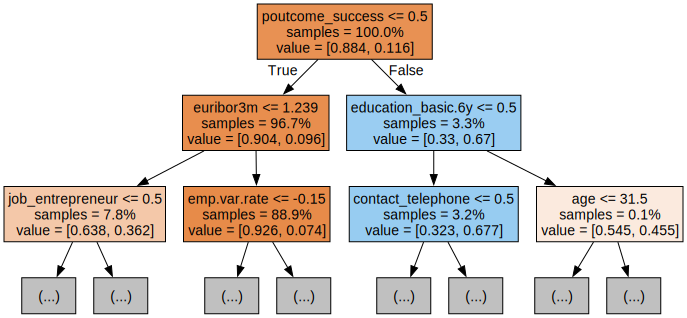

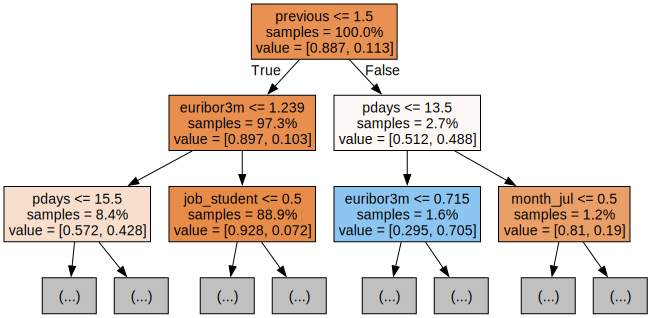

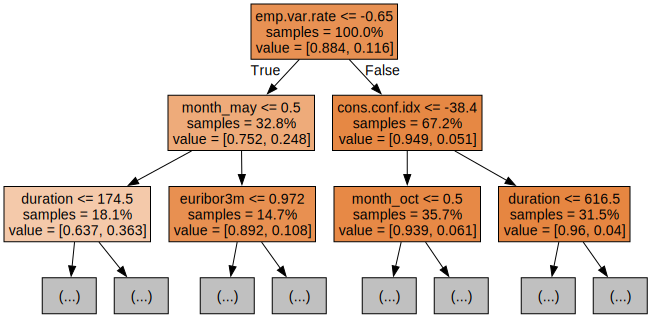

In [26]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)